In [1]:
from keras.layers import Input, Dense, Lambda, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/ak/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ak/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ak/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ak/anaconda3/lib/python3.7/site-packages/tensorflow/python/fra

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = r'Images/Train/'
valid_path = r'Images/Validate/'

In [5]:
# Add preprocessing Layer to the VGG16
vgg = VGG16(input_shape = IMAGE_SIZE+[3], weights='imagenet', include_top = False)

# excluding existing pretrained layers to train again
for layer in vgg.layers:
    layer.trainable = False

In [43]:
# Getting the number of classes
folders = glob(r'Images/Train/*')

In [44]:
len(folders)

2

In [46]:
# Making our training layer
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation = 'softmax')(x)

model = Model(inputs = vgg.input, output = prediction)

/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


In [9]:
# model.summary()

In [48]:
# Compiling the model
model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [49]:
# Image Augumentation for generating more number of training sets
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [50]:
# Image Augumentation for testing
test_datagen = ImageDataGenerator(rescale = 1./255)

In [51]:
# Training set
training_set = train_datagen.flow_from_directory(r'Images/Train',
                                                target_size = (224,224),
                                                batch_size = 8,
                                                class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [52]:
# Training set
test_set = test_datagen.flow_from_directory(r'Images/Validate',
                                                target_size = (224,224),
                                                batch_size = 8,
                                                class_mode = 'categorical')

Found 60 images belonging to 2 classes.


In [53]:
r = model.fit_generator(training_set,
                        validation_data = test_set,
                        epochs = 10,
                       steps_per_epoch = len(training_set),
                       validation_steps = len(test_set))

Epoch 1/10
25/25 [==============================] - 239s 10s/step - loss: 0.4728 - accuracy: 0.8850 - val_loss: 2.7762e-04 - val_accuracy: 1.0000
Epoch 2/10
25/25 [==============================] - 257s 10s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 256s 10s/step - loss: 8.3472e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 256s 10s/step - loss: 3.1737e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 256s 10s/step - loss: 2.8186e-04 - accuracy: 1.0000 - val_loss: 9.2702e-05 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 256s 10s/step - loss: 2.1889e-04 - accuracy: 1.0000 - val_loss: 7.4022e-04 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 256s 10s/step - loss: 1.6416e-04 - accuracy: 1.0000 - val_loss: 0.00

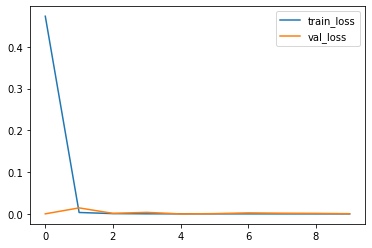

<Figure size 432x288 with 0 Axes>

In [54]:
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig(r'Plotted/Loss')

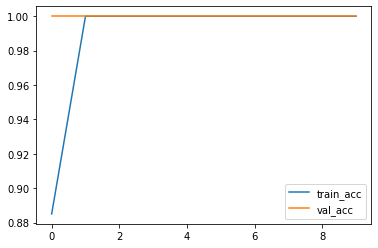

<Figure size 432x288 with 0 Axes>

In [56]:
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig(r'Plotted/Accuracy')

In [57]:
model.save(r'Face_Recognition.h5')